## Naive Bayes Classifier for Yelp and Amazon Reviews -- Kristofer Schobert

We will be making a Naive Bayes Classifier to classify reviews by sentiment (a good review or a bad review). We will train our model on the majority of the yelp reviews, leaving 3/10 of the datapoints to be test data. Afterwards we will see how this model translates to classifying Amazon reviews.

The datasets can be downloaded from https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

We first train our model:

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [264]:
data_path = 'yelp_labelled.txt'
df = pd.read_csv(data_path, delimiter= '\t', header=None)
df.columns = ['review', 'sentiment']

The features of this model will be a list of keywords we expect to distinguish good and bad reviews. This is a list of mostly pleased and upset words. Neutral words will give little to no indication if the review is positive or negative.

We will drop any keywords that are not present in any of the training data. 

In [256]:


keywords = ['hate', 'bad', 'horrible', 'terrible', 'poor', 'crappy', 'lousy', 'uncomfortable', 'smelly', 'disgusting',
           'awful', 'wait', 'expensive', 'nasty', 'time', 'wasted', 'disappointing', 'immediately', 'worst', 'won\'t', 
           'happy', 'great', 'best', 'nice', 'lovely', 'charming', 'fantastic', 'helpful', 'tasty', 'wonderful',
           'delicious', 'beautiful','money','bought','care','bring','owners','really','awesome','not','leave','cold',
           'go','were','never','please','hour','minutes','extremely', 'over-priced', '30' ,'45', 'angry' ,'recommend', 
            'didn\'t', 'gross', 'the']
keywords_that_exist = keywords.copy()
print('the features that are not used are...')
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[key] = df.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    # If a word in keywords is never used, it will get dropped here
    if df[key].nunique() == 1:
        df = df.drop([key], axis=1)
        
        keywords_that_exist.remove(key)
        
        print(key)    

the features that are not used are...
lousy
smelly
disgusting
wait
nasty
immediately
lovely
charming
tasty
wonderful
delicious
bring
owners
leave
cold
over-priced
30
angry
gross


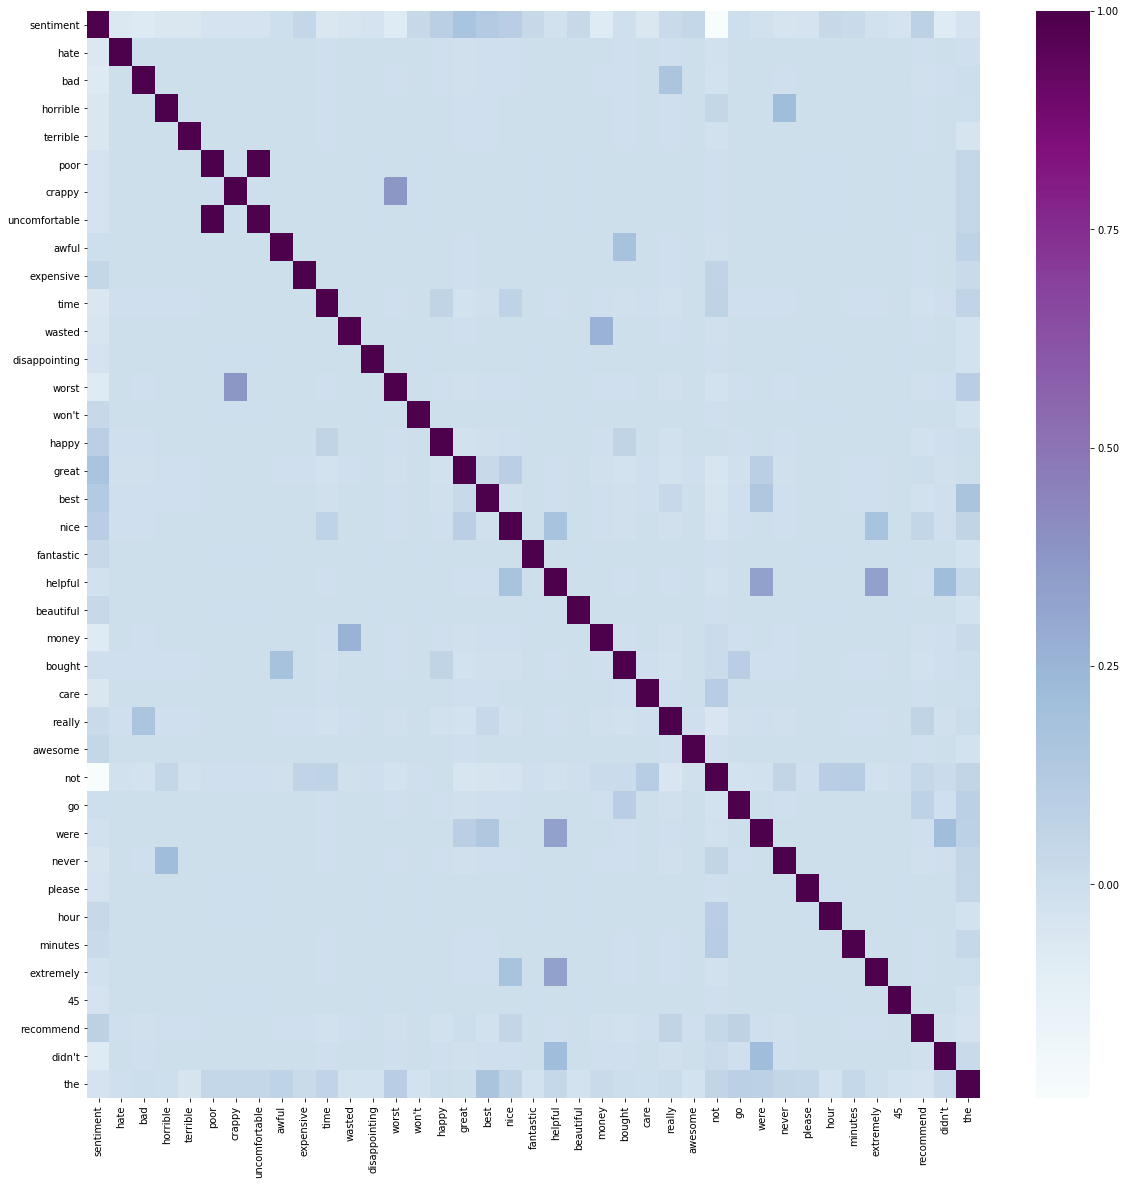

In [263]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),cmap="BuPu")

Here we have a correlation table for all the features shown as a heatmap. The first column of the heatmap is significant. It is shows the correlation of each of our features with our outcome variable, sentiment. The words "great" and "awesome" are highly correlated with positive reviews, while "not" is the word most correlated with negative reviews. Also, most all the features have a near zero correlation with eachother. This is what we seek when working with a Naive Bayes Model. We are assuming the features to be conditionally independent from one another. It is worth noting the "poor" and "uncomfortable" have a very high correlation. This is likely because one of the reviews has both of these words, and no other review contains them. While this does seem to violate conditional dependance, I will leave both features in. Our outside knowledge lets us know that both of these words will be most likely used in a negative review, and both words will be useful to have as features when testing our model. 

I at first tried thinking of adjectives that one would use in a positive or negative review. But after some inspection of the reviews, I began to broaden my scope, recognizing that words like "not" were often used in negative reviews. I also tried "the". This word is, of course, common in the data. Our model does not count the number of times a word is used in a review, just whether or not it is used. One might think of someone listing complaints using the word "the" when listing. Still, our model will not use information about the number of uses. We will keep the word "the" as a feature regardless. It does improve the models accuracy some. 

I am aware that this is an large number of features, but they are all valuable and not computationally expensive. It seems one needs a long list of words because of the variability in reviews. There is not a common polarizing word in these reviews, so a long list is necessary. A number of the reviews lack all of these words I have listed here. 

In [258]:
last_test_entry = 700

#using 800 of the 1000 training data points
data = df[keywords_that_exist].iloc[0:last_test_entry]
target = df['sentiment'].iloc[0:last_test_entry]

#using the other 200 as test data points
test_data = df[keywords_that_exist].iloc[last_test_entry:1000]
test_target = df['sentiment'].iloc[last_test_entry:1000]




In [259]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
model_prediction_for_test_data = bnb.predict(test_data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    test_data.shape[0],
    (test_target != model_prediction_for_test_data).sum()
))

Number of mislabeled points out of a total 300 points : 124


So after training our data on 700 Yelp reviews, we have correctly classified 124/300 of the reviews. One bias in this process is that sklearn.naive_bayes defaults to prediciting a positive review if none of the features are present in the review. Thus, a model with no features or with an excellent list of features only correclating strongly with positive reviews one would expect 150/300 successes. It is a real challenge to find common featuers in negative reviews. 

In [260]:
data_path = 'amazon_cells_labelled.txt'
df = pd.read_csv(data_path, delimiter= '\t', header=None)
df.columns = ['review', 'sentiment']

In [261]:

keywords_that_exist = keywords.copy()
print('the features that are not used are...')
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[key] = df.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    # If a word in keywords is never used, it will get dropped here
    if df[key].nunique() == 1:
        df = df.drop([key], axis=1)
        
        keywords_that_exist.remove(key)
        
        print(key)
        

the features that are not used are...
lousy
smelly
disgusting
wait
nasty
immediately
lovely
charming
tasty
wonderful
delicious
bring
owners
leave
cold
over-priced
30
angry
gross


In [262]:

data = df[keywords_that_exist]
target = df['sentiment']
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
model_prediction_for_test_data = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != model_prediction_for_test_data).sum()
))


Number of mislabeled points out of a total 1000 points : 382


Our model seemed to do alright classifying amazon reviews. It has a higher success here than the 300 Yelp reviews it was tested on. It was not designed to do this. It was meant for Yelp (often times resaurant) reviews. I also noticed that while the feature "the" helped the Yelp model, it made the Amazon model worse. It is reasonable that word "the" is not the best indicator of a good or bad review. 

## Final Thoughts

While our model is not the strongest it is certainly on the right track. 

What other words would one expect in poor reviews? A strong list of negative words would really benifit our model. The word in our model that most strongly correlats with a negative review is the word "not". We could try this model out on more reviews and see how it translates to other kinds of reviews. 

It seems the most helpful way of determining useful features was just to look at a few reviews. Brainstorming adjetives only works so well. Seeing the real data to get a feel for it is much more helpful. 

I feel an expansive list of keywords is the good method for determining features in this kind of review classifier. With a language so vast it is necessary to employ a large list of words in a Naive Bayes Classifies like this one.  